In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv(r'D:\Github projects\Titanic-dataset-solution-with-data/train.csv')

### Types of missing values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing Values completely at Random 
When the missing values has no probability or relation with the other values in the column then it is missing values completely
at random 

In [9]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing values not at random 
When the missing values has some relation with the dataset and the other values
in the column it is called missing values not at random 

In [13]:
df['cabin_null']= np.where(df['Cabin'].isnull(),1,0) 
# ALl the NaN values in the dataset is replaced by 1 and the non null value in the column is replaced by 0
#calculate the percentage of missing values1
round(df['cabin_null'].mean()*100,2)

77.1

In [16]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Techniques of handling missing values 

1. Mean/Median/Mode replacement 
2. Random Sample Imputation 
3. Capturing NaN values with a new features 
4. End of distribution imputation  
5. Arbitrary Imputation 
6. Frequent Categories Imputation 

#### Mean Median Mode imputation 
When should we apply ?
Mean Median imputation has the assumption that the data are missing completely at random 
This is solved by replacing the NaN values with the most frequent value in the column 

In [28]:
def impute_NaN(df,variable,replace_val):
    df[variable] = df[variable].fillna(replace_val)

In [34]:
Median = df.Age.median()
print(Median)

28.0


In [32]:
impute_NaN(df,'Age',Median)
df['Age'].isnull().mean()

0.0

#### Advantages and Disadvantage of Mean/Median Imputation 
Advantage:-
    1. easy to implement
    2. robust to outlier 
    3. A faster way to obtain the complete dataset 
Disadvantages:-
    1. Distortion in the variance of the data 
    2. Impacts the correlation 

#### Random Sample imputation 

The goal of the technique is to take random observation from the dataset and we use this observation to replace the NaN values. 

When to be used ? 
It is required to be used when the data is missing completely at random (MCAR)


In [4]:
df = pd.read_csv(r'D:\Github projects\Titanic-dataset-solution-with-data/train.csv',usecols = ['Age','Fare','Survived'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [5]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

883    28.0
33     66.0
857    51.0
551    27.0
151    22.0
       ... 
165     9.0
672    70.0
86     16.0
586    47.0
874    28.0
Name: Age, Length: 177, dtype: float64

In [6]:
def impute_NaN(df,variable,replace_val):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [7]:
median=df.Age.median()

In [9]:
impute_NaN(df,"Age",median)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Age_median  891 non-null    float64
 4   Age_random  891 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.9 KB


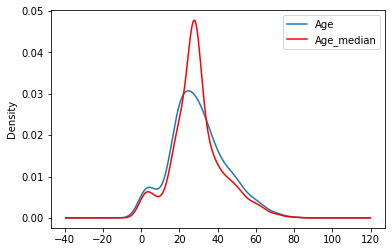

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

This is the probability density function of the column Age and the Age_median column 

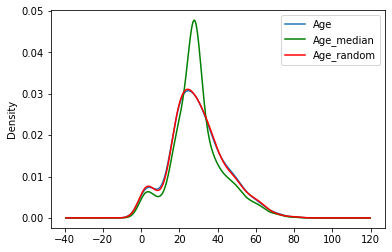

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

The variance is pretty similar in case of random sample imputation while the variance is distorted in the case of median imputation from the original data 

#### Advantages and Disadvantages of random sample imputation
Advantages:-
    1. Easy to implement 
    2. does not change the variance of the data
Disadvantages:-
    1. Randomness does not work all the time.


#### Capturing NaN values with a new features 

It works well if the data is not missing completely at normal 

In [23]:
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)

In [25]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NaN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,NaN,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


In [22]:
df.Age_NaN.sum()

177

#### Advantages and Disadvantages of imputing with new features 
Advantages:-
    1. Easy to implement 
    2. Captures the importance of the missing values 
Disadvantages:-
    1. It causes the curse of dimensionality 

#### End of Distribution Imputation 